# **Problema 1**

*Descripción:*

En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

*Dataset:*

El dataset proporcionado incluye las siguientes variables para cada estudiante:

**Hours Studied:** El número total de horas dedicadas al estudio por cada estudiante.

**Previous Scores:** Las puntuaciones obtenidas por los estudiantes en exámenes previos.

**Extracurricular Activities:** Si el estudiante participa en actividades extracurriculares (Sí o No).

**Sleep Hours:** El número promedio de horas de sueño que el estudiante tuvo por día.

**Sample Question Papers Practiced:** El número de cuestionarios de muestra que el estudiante practicó.

Además, el dataset incluye la variable objetivo:

**Performance Index:** Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

*Objetivo:*

Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

Comenzaremos haciendo un análisis del dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/sofiarondini/AA2/main/Student_Performance.csv'
df1 = pd.read_csv(url)
df1.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Observamos que las columnas son todas numéricas excepto Activities, la convertiremos.

In [ ]:
df1.rename(columns={
    'Hours Studied': 'estudio_horas',
    'Previous Scores': 'puntuaciones_previas',
    'Extracurricular Activities': 'actividades_extracurriculares',
    'Sleep Hours': 'horas_sueño',
    'Sample Question Papers Practiced': 'cuestionarios_practicados',
    'Performance Index': 'puntuacion'
}, inplace=True)

In [ ]:
print(df1.describe())

       estudio_horas  puntuaciones_previas   horas_sueño  \
count   10000.000000          10000.000000  10000.000000   
mean        4.992900             69.445700      6.530600   
std         2.589309             17.343152      1.695863   
min         1.000000             40.000000      4.000000   
25%         3.000000             54.000000      5.000000   
50%         5.000000             69.000000      7.000000   
75%         7.000000             85.000000      8.000000   
max         9.000000             99.000000      9.000000   

       cuestionarios_practicados    puntuacion  
count               10000.000000  10000.000000  
mean                    4.583300     55.224800  
std                     2.867348     19.212558  
min                     0.000000     10.000000  
25%                     2.000000     40.000000  
50%                     5.000000     55.000000  
75%                     7.000000     71.000000  
max                     9.000000    100.000000  


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   estudio_horas                  10000 non-null  int64  
 1   puntuaciones_previas           10000 non-null  int64  
 2   actividades_extracurriculares  10000 non-null  object 
 3   horas_sueño                    10000 non-null  int64  
 4   cuestionarios_practicados      10000 non-null  int64  
 5   puntuacion                     10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


No tenemos datos faltantes.

In [ ]:
df1['actividades_extracurriculares'] = df1['actividades_extracurriculares'].replace({'Yes': 1, 'No': 0})

<ipython-input-7-878b2fd37f4a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['actividades_extracurriculares'] = df1['actividades_extracurriculares'].replace({'Yes': 1, 'No': 0})


In [ ]:
df1.head(3)

,estudio_horas,puntuaciones_previas,actividades_extracurriculares,horas_sueño,cuestionarios_practicados,puntuacion
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


A través de la matriz de correlación observaremos que combinación de variables explican mejor a los datos de puntuación.

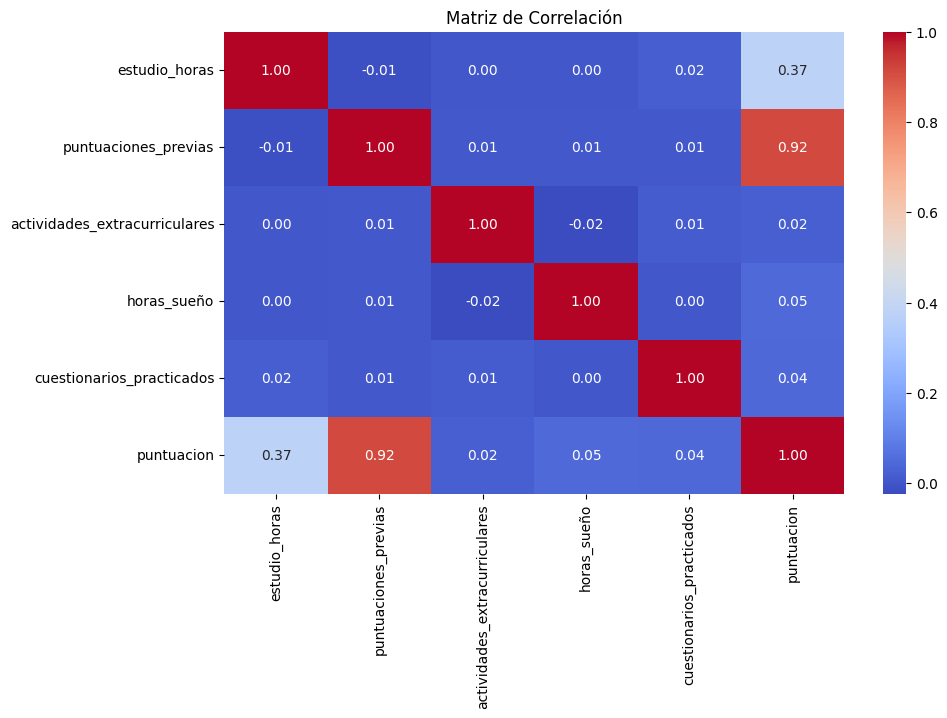

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Las que mayor relación guardan con puntuación son estudio_horas u puntuaciones_previas, siendo esta última la mayor.

Graficaremos estas en relación a otros aspectos para analizarlo.

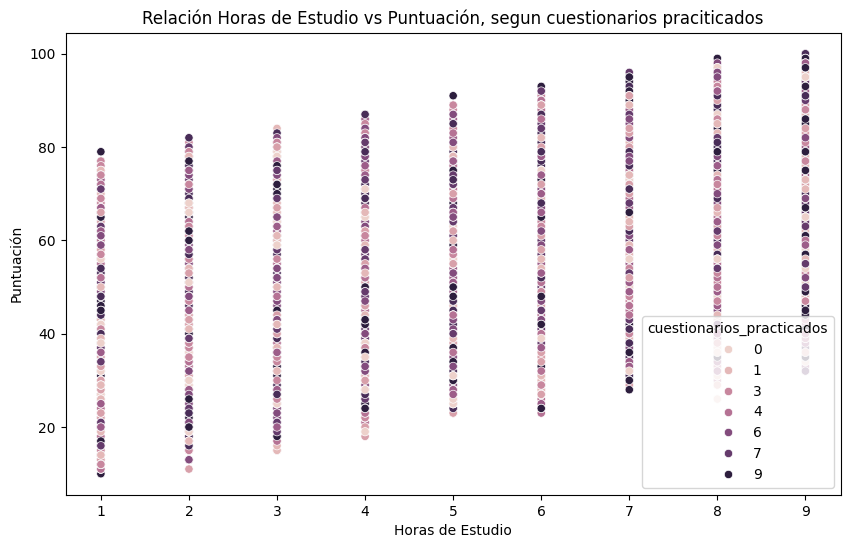

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='estudio_horas', y='puntuacion', hue='cuestionarios_practicados')
plt.title('Relación Horas de Estudio vs Puntuación, segun cuestionarios praciticados')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.show()

Horas de estudio y puntuación guardan relación pero cuestionarios practicados no nos da información extra, tal como vimos en la matriz.

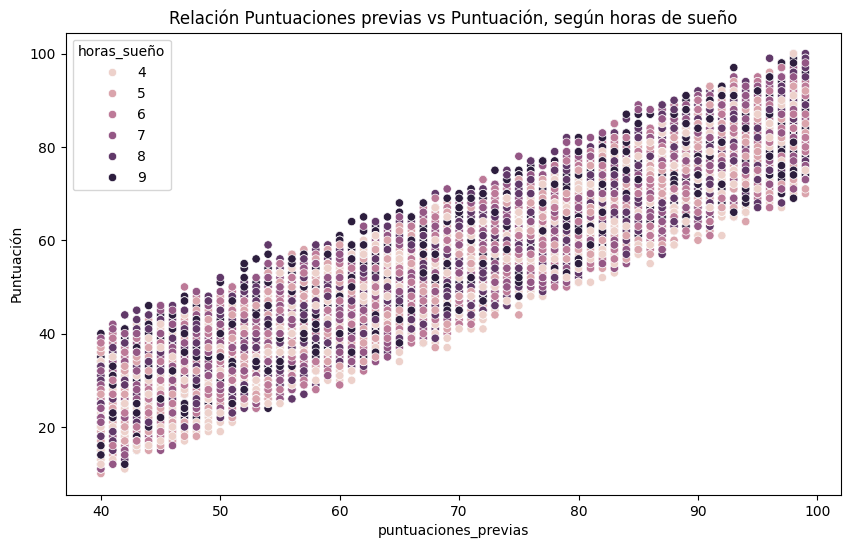

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='puntuaciones_previas', y='puntuacion', hue='horas_sueño')
plt.title('Relación Puntuaciones previas vs Puntuación, según horas de sueño')
plt.xlabel('puntuaciones_previas')
plt.ylabel('Puntuación')
plt.show()

Hay una muy leve tendencia de que mas horas de sueño mas puntuación pero no llega a ser marcada, por eso en la matriz no se ve reflejado.

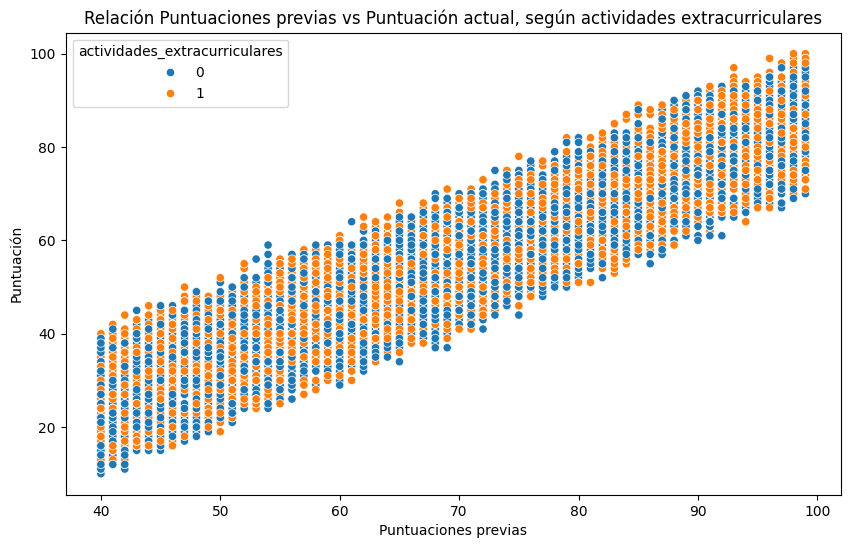

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='puntuaciones_previas', y='puntuacion', hue='actividades_extracurriculares')
plt.title('Relación Puntuaciones previas vs Puntuación actual, según actividades extracurriculares')
plt.xlabel('Puntuaciones previas')
plt.ylabel('Puntuación')
plt.show()

Al igual que el primer gráfico, actividades extracurriculares no marca ninguna diferencia en la relación.

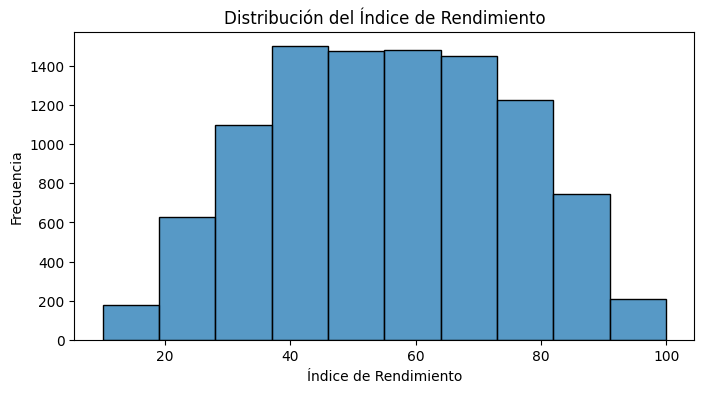

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df1['puntuacion'], bins=10)
plt.title('Distribución del Índice de Rendimiento')
plt.xlabel('Índice de Rendimiento')
plt.ylabel('Frecuencia')
plt.show()

La distribución es simétrica.

Comenzaremos con el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:
X = df1.drop('puntuacion', axis=1)
y = df1['puntuacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

Usamos MSE porque es útil para hacer que el modelo se ajuste mejor a los datos. Y MAE porque combinadas nos dan una comprensión general de los datos y errores.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 916.3925 - mae: 19.1852 - val_loss: 8.6965 - val_mae: 2.3450
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.8813 - mae: 2.2091 - val_loss: 5.2752 - val_mae: 1.8311
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.4534 - mae: 1.8622 - val_loss: 4.8008 - val_mae: 1.7429
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0817 - mae: 1.7699 - val_loss: 5.2059 - val_mae: 1.8212
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0128 - mae: 1.7981 - val_loss: 5.2944 - val_mae: 1.8208
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9357 - mae: 1.7680 - val_loss: 5.0501 - val_mae: 1.7955
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0360 - mae: 1.7864 - val_loss: 5.4547 - val_mae: 1.8615
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1139 - mae: 1.7948 - val_loss: 6.0928 - val_mae: 1.9771
Epoch 9/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step -

In [ ]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


R2 Mide qué tan bien las predicciones del modelo se ajustan a los datos reales

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.2f}, MAE: {mae:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0224 - mae: 1.7925
Loss: 4.90, MAE: 1.77
R²: 0.99


El loss es bajo lo que indica que las predicciones del modelo están bastante cercanas a los valores reales.

El MAE dice que el modelo no explica bien 1.77 unidades, teniendo en cuenta que el rango de nuestro dataset es de 0 a 100, nos indica un buen modelo.

Y el R2 es muy alto, todos los datos se explican con las variables utilizadas.


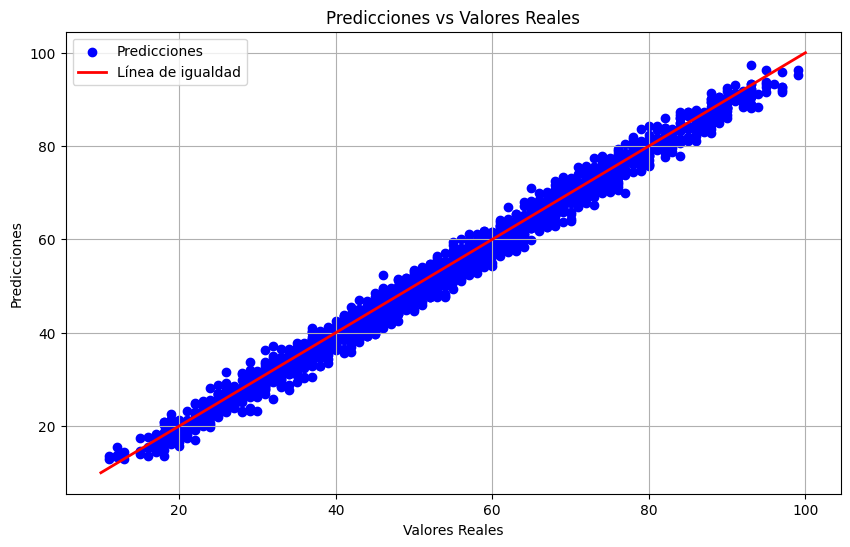

In [ ]:
def plot_results(X, y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predicciones')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea de igualdad')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Valores Reales')
    plt.legend()
    plt.grid()
    plt.show()

plot_results(X_test, y_test, y_pred)

Las predicciones se acercan muy bien a los valores reales.

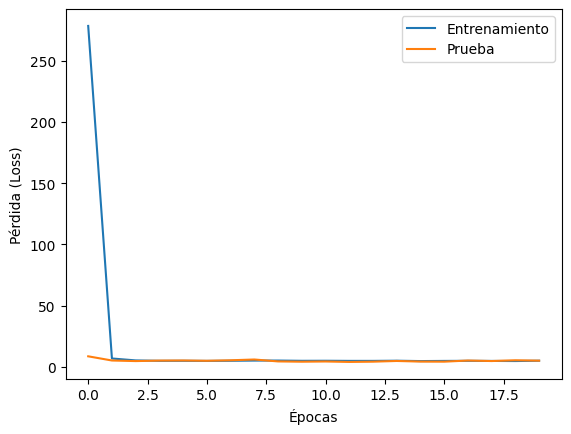

In [ ]:
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

La primer época comienza con un loss muy alto que luego disminuye fuertemente.

Experiencia de eliminar columnas que no tienen correlacion lineal:

In [ ]:
X2 = df1.drop(columns=['actividades_extracurriculares', 'horas_sueño', 'cuestionarios_practicados', 'puntuacion'], axis=1)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1045.2395 - mae: 21.1484 - val_loss: 8.8317 - val_mae: 2.3936
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.2347 - mae: 2.2633 - val_loss: 5.2998 - val_mae: 1.8439
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.2508 - mae: 1.8088 - val_loss: 4.5703 - val_mae: 1.7101
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.8638 - mae: 1.7636 - val_loss: 4.4055 - val_mae: 1.6720
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1163 - mae: 1.7966 - val_loss: 4.3770 - val_mae: 1.6663
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8340 - mae: 1.7602 - val_loss: 5.1833 - val_mae: 1.8133
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1922 - mae: 1.8145 - val_loss: 6.0184 - val_mae: 1.9519
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3299 - mae: 1.8212 - val_loss: 4.6032 - val_mae: 1.6984
Epoch 9/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step 

In [ ]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


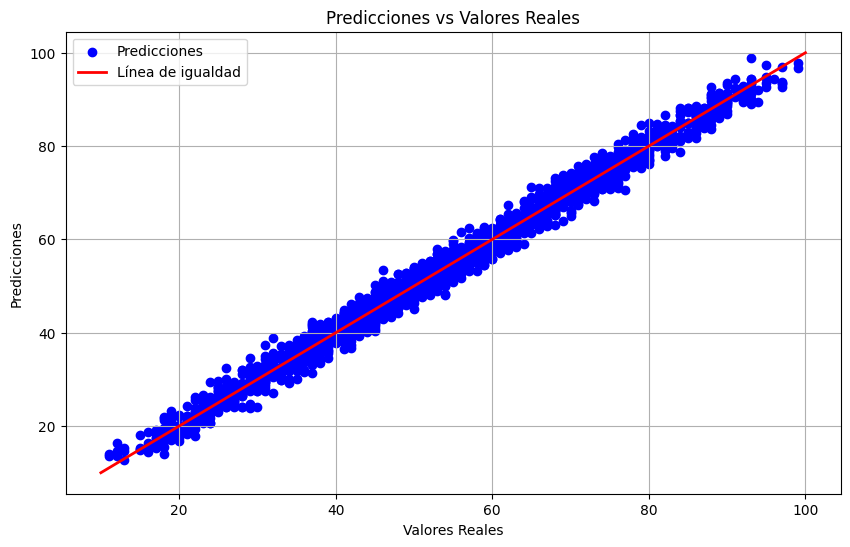

In [ ]:
def plot_results(X, y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predicciones')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Línea de igualdad')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Valores Reales')
    plt.legend()
    plt.grid()
    plt.show()

plot_results(X_test, y_test, y_pred)

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.2f}, MAE: {mae:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2294 - mae: 1.6387
Loss: 4.21, MAE: 1.63
R²: 0.99


Tanto el loss como el MAE mejoran brevemente, no vemos una gran diferencia entre el modelo con todas las variables o solo con las que mas relación tienen.

**Conclusión:**

En términos generales el modelo funciona muy bien.